In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [56]:
df=pd.read_csv('/content/gdrive/My Drive/normal_abnormal.csv')

In [57]:
df

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...,...
405,406,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
406,407,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
407,408,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
408,409,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [58]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labenc=LabelEncoder()    #label or indexing of categorical data
df["class"]=labenc.fit_transform(df["class"])   
df

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...,...
405,406,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
406,407,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
407,408,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
408,409,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [59]:
df['class'].value_counts()

0    210
1    200
Name: class, dtype: int64

In [60]:
X=df.drop(columns = ['class'])
y=df['class']

In [61]:
X

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...,...
405,406,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
406,407,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
407,408,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
408,409,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [62]:
y

0      0
1      0
2      0
3      0
4      0
      ..
405    1
406    1
407    1
408    1
409    1
Name: class, Length: 410, dtype: int64

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [64]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
import seaborn as sn

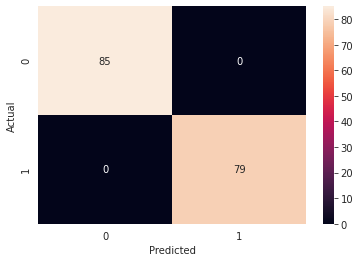

In [66]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [67]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [68]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  1.0


In [69]:
!pip install scikit-plot==0.3.7

In [70]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

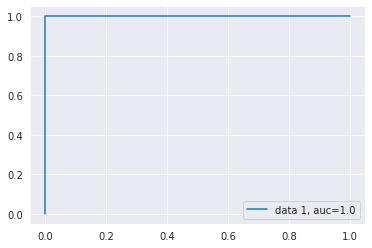

In [71]:
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [72]:
!pip install plot-metric

In [73]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

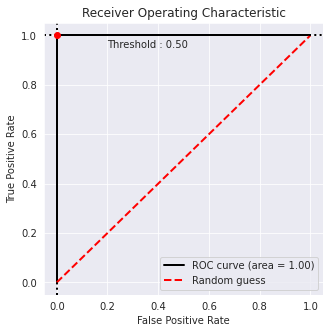

In [74]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [75]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt


# # y_true = y_test
# # y_probas = y_pred
# # skplt.metrics.plot_roc_curve(y_true, y_probas)
# # plt.show()

# skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
# plt.show()

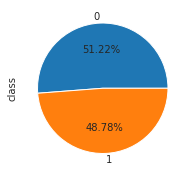

In [76]:
plt.figure(figsize=(3,3))
pd.Series(df['class']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [53]:
y_score_rf = logistic_regression.predict_proba(X_test)[:,-1]

In [54]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, y_score_rf)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 1.0


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

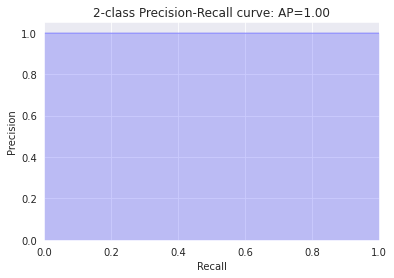

In [55]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score_rf)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) 

In [19]:
#logistic regression

In [20]:
from sklearn.linear_model.logistic import LogisticRegression 
lgsr=LogisticRegression(random_state=0) 
lgsr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
 y_pred=lgsr.predict(x_test) 
y_pred 

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [22]:
from sklearn.metrics import confusion_matrix 
conf_matrix=confusion_matrix(y_pred,y_test) 
conf_matrix

array([[62,  0],
       [ 0, 61]])

In [23]:
!pip install scikit-plot

In [24]:
from sklearn.metrics import accuracy_score 
acc_sco=accuracy_score(y_test,y_pred) 
acc_sco

1.0